___
# Ciência dos Dados - PROJETO 1

## Alfredo Simões Cassiano Acerbi
___

## COMPARANDO OS HABITOS ALIMENTARES ENTRE RORAIMA E SÂO PAULO

___
## Introdução

   Meu projeto tem como objetivo comparar a situação alimentar da população dos estados de São Paulo e Roraima, respectivamente o maior e menor PIB do Brasil em 2013. Tendo em vista que o PIB pode ser considerado um bom indicador da pobreza e riqueza de um estado, pretendo entender como este fator influencia nos habitos alimentares da população.
   
   Serão avaliados itens como presença ou não de água canalizada, tipo da geladeira, tipo do fogão e total de moradores do domicício, procurando aferir se fatores como esses têm alguma relação com a alimentação saudável. No caso de se já tiver havido um momento no qual alguém do domicício não pôde se alimentar de maneira saudável por falta de dinheiro, será avaliado qual atitude foi tomada.
   
   Para poder fazer uma comparação mais precisa e direcionada, estudarei apenas domicílios na zona urbana (cidades), com renda mensal de 1 a 3 salários mínimos per capita e que tenham seneamento básico, buscando assim compreender como se dá a alimentação nas residências com condições parecidas desses estados tão diferentes.



___
## Análise e Resultados

In [258]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [259]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\User


In [260]:
#PNAD2013
arq = pd.read_csv('DOM2013_11.csv')




In [261]:
arq['SM'] = (arq.V4621)/678

z = arq.loc[((arq.UF == 14)|(arq.UF == 35)) & (arq.V4105 == 1) & ((arq.SM>=1) & (arq.SM<=3)), ['UF', 'V4621', 'SM', 'V0217', 'V0228', 'V4620', 'V0211', 'V0223', 'V2107','V2138', 'V2139']]
z.columns = ['UF', 'RENDIMENTO', 'Rendimento mensal per capita/SM', 'SANEAMENTO', 'GELADEIRA', 'Total_componentes_dom', 'Agua_canalizada', 'Tipo do fogão', 'Ficar_sem_din_p_alimentação_saudável', 'Principal_atitude', 'Outra atitude']


z.loc[z.UF == 14,'ESTADO'] = 'Roraima' 
z.loc[z.UF == 35,'ESTADO'] = 'São Paulo' 
z.loc[z.SANEAMENTO == 1 , 'SANEAMENTO'] = 'Rede Coletora' 
z.loc[z.SANEAMENTO == 2 , 'SANEAMENTO'] = 'Fossa séptica ligada a rede coletora' 
z.loc[z.Ficar_sem_din_p_alimentação_saudável == 1 , 'Ficar_sem_din_p_alimentação_saudável'] = 'Sim' 
z.loc[z.Ficar_sem_din_p_alimentação_saudável == 3 , 'Ficar_sem_din_p_alimentação_saudável'] = 'Não'
z.loc[z.GELADEIRA == 2 , 'GELADEIRA'] = '2 portas'
z.loc[z.GELADEIRA == 4 , 'GELADEIRA'] = '1 porta' 
z.loc[z.GELADEIRA == 6 , 'GELADEIRA'] = 'Não'
z.loc[z.Agua_canalizada == 1 , 'Agua_canalizada'] = 'Sim'
z.loc[z.Agua_canalizada == 3 , 'Agua_canalizada'] = 'Não'



z





,UF,RENDIMENTO,Rendimento mensal per capita/SM,SANEAMENTO,GELADEIRA,Total_componentes_dom,Agua_canalizada,Tipo do fogão,Ficar_sem_din_p_alimentação_saudável,Principal_atitude,Outra atitude,ESTADO
8186,14,1100.0,1.622419,Rede Coletora,1 porta,2.0,Sim,1.0,Não,NaN,NaN,Roraima
8189,14,750.0,1.106195,Rede Coletora,2 portas,4.0,Sim,1.0,Não,NaN,NaN,Roraima
8190,14,1000.0,1.474926,Rede Coletora,2 portas,2.0,Sim,1.0,Não,NaN,NaN,Roraima
8193,14,1300.0,1.917404,Rede Coletora,1 porta,1.0,Sim,1.0,Não,NaN,NaN,Roraima
8195,14,1266.0,1.867257,Rede Coletora,1 porta,3.0,Sim,1.0,Não,NaN,NaN,Roraima
8196,14,1159.0,1.709440,Rede Coletora,1 porta,3.0,Sim,1.0,Não,NaN,NaN,Roraima
8197,14,1000.0,1.474926,Rede Coletora,2 portas,3.0,Sim,1.0,Não,NaN,NaN,Roraima
8199,14,1500.0,2.212389,Rede Coletora,1 porta,2.0,Sim,1.0,Não,NaN,NaN,Roraima
8203,14,1556.0,2.294985,Rede Coletora,2 portas,5.0,Sim,1.0,Não,NaN,NaN,Roraima
8205,14,2000.0,2.949853,Rede Coletora,1 porta,1.0,Sim,1.0,Não,NaN,NaN,Roraima


In [262]:
#z.to_excel('projeto1CD_check1.xlsx')

In [263]:
#amostra em sp
zsp = z.loc[(z.UF == 35)]
zsp

,UF,RENDIMENTO,Rendimento mensal per capita/SM,SANEAMENTO,GELADEIRA,Total_componentes_dom,Agua_canalizada,Tipo do fogão,Ficar_sem_din_p_alimentação_saudável,Principal_atitude,Outra atitude,ESTADO
91642,35,833.0,1.228614,Rede Coletora,2 portas,3.0,Sim,1.0,Não,NaN,NaN,São Paulo
91645,35,1100.0,1.622419,Rede Coletora,1 porta,2.0,Sim,1.0,Não,NaN,NaN,São Paulo
91646,35,950.0,1.401180,Rede Coletora,1 porta,2.0,Sim,1.0,Não,NaN,NaN,São Paulo
91647,35,2000.0,2.949853,Rede Coletora,2 portas,1.0,Sim,NaN,Não,NaN,NaN,São Paulo
91648,35,930.0,1.371681,Rede Coletora,2 portas,2.0,Sim,1.0,Não,NaN,NaN,São Paulo
91650,35,2000.0,2.949853,Rede Coletora,2 portas,1.0,Sim,1.0,Não,NaN,NaN,São Paulo
91657,35,1000.0,1.474926,Rede Coletora,1 porta,2.0,Sim,1.0,Não,NaN,NaN,São Paulo
91658,35,950.0,1.401180,Rede Coletora,2 portas,4.0,Sim,1.0,Não,NaN,NaN,São Paulo
91660,35,678.0,1.000000,Rede Coletora,Não,1.0,Sim,1.0,Não,NaN,NaN,São Paulo
91661,35,678.0,1.000000,Rede Coletora,2 portas,1.0,Sim,1.0,Não,NaN,NaN,São Paulo


In [264]:
#amostra em roraima
zr = z.loc[(z.UF == 14)]
zr

,UF,RENDIMENTO,Rendimento mensal per capita/SM,SANEAMENTO,GELADEIRA,Total_componentes_dom,Agua_canalizada,Tipo do fogão,Ficar_sem_din_p_alimentação_saudável,Principal_atitude,Outra atitude,ESTADO
8186,14,1100.0,1.622419,Rede Coletora,1 porta,2.0,Sim,1.0,Não,NaN,NaN,Roraima
8189,14,750.0,1.106195,Rede Coletora,2 portas,4.0,Sim,1.0,Não,NaN,NaN,Roraima
8190,14,1000.0,1.474926,Rede Coletora,2 portas,2.0,Sim,1.0,Não,NaN,NaN,Roraima
8193,14,1300.0,1.917404,Rede Coletora,1 porta,1.0,Sim,1.0,Não,NaN,NaN,Roraima
8195,14,1266.0,1.867257,Rede Coletora,1 porta,3.0,Sim,1.0,Não,NaN,NaN,Roraima
8196,14,1159.0,1.709440,Rede Coletora,1 porta,3.0,Sim,1.0,Não,NaN,NaN,Roraima
8197,14,1000.0,1.474926,Rede Coletora,2 portas,3.0,Sim,1.0,Não,NaN,NaN,Roraima
8199,14,1500.0,2.212389,Rede Coletora,1 porta,2.0,Sim,1.0,Não,NaN,NaN,Roraima
8203,14,1556.0,2.294985,Rede Coletora,2 portas,5.0,Sim,1.0,Não,NaN,NaN,Roraima
8205,14,2000.0,2.949853,Rede Coletora,1 porta,1.0,Sim,1.0,Não,NaN,NaN,Roraima


In [265]:
# % da amostra que ja ficou sem alimentação saudavel
z.Ficar_sem_din_p_alimentação_saudável.value_counts(True)*100

Não    95.06949
Sim     4.93051
Name: Ficar_sem_din_p_alimentação_saudável, dtype: float64

In [266]:
# amostra que ja ficou sem alimentação saudavel
z.Ficar_sem_din_p_alimentação_saudável.value_counts()

Não    5746
Sim     298
Name: Ficar_sem_din_p_alimentação_saudável, dtype: int64

In [267]:
#amostra sem alimentação saudável
zsd = z.loc[(z.Ficar_sem_din_p_alimentação_saudável == 'Sim')]
zsd


,UF,RENDIMENTO,Rendimento mensal per capita/SM,SANEAMENTO,GELADEIRA,Total_componentes_dom,Agua_canalizada,Tipo do fogão,Ficar_sem_din_p_alimentação_saudável,Principal_atitude,Outra atitude,ESTADO
8213,14,1060.0,1.563422,Rede Coletora,1 porta,3.0,Sim,1.0,Sim,3.0,15.0,Roraima
8243,14,1000.0,1.474926,3,1 porta,2.0,Sim,1.0,Sim,NaN,NaN,Roraima
8272,14,800.0,1.179941,Rede Coletora,1 porta,2.0,Sim,1.0,Sim,NaN,NaN,Roraima
8273,14,1712.0,2.525074,Rede Coletora,2 portas,4.0,Sim,1.0,Sim,NaN,NaN,Roraima
8277,14,1589.0,2.343658,Rede Coletora,2 portas,2.0,Sim,1.0,Sim,NaN,NaN,Roraima
8278,14,678.0,1.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,4.0,6.0,Roraima
8280,14,1519.0,2.240413,3,1 porta,4.0,Sim,1.0,Sim,6.0,3.0,Roraima
8287,14,2000.0,2.949853,3,2 portas,2.0,Sim,1.0,Sim,NaN,NaN,Roraima
8321,14,800.0,1.179941,3,1 porta,1.0,Sim,1.0,Sim,14.0,NaN,Roraima
8330,14,855.0,1.261062,3,1 porta,4.0,Sim,1.0,Sim,14.0,NaN,Roraima


In [268]:
#y.to_excel('projeto1CD_check1_tabela2.xlsx')

In [269]:
#sem dinheiro em roraima
rsd = zsd.loc[(y.UF == 14)]
rsd


,UF,RENDIMENTO,Rendimento mensal per capita/SM,SANEAMENTO,GELADEIRA,Total_componentes_dom,Agua_canalizada,Tipo do fogão,Ficar_sem_din_p_alimentação_saudável,Principal_atitude,Outra atitude,ESTADO
8213,14,1060.0,1.563422,Rede Coletora,1 porta,3.0,Sim,1.0,Sim,3.0,15.0,Roraima
8243,14,1000.0,1.474926,3,1 porta,2.0,Sim,1.0,Sim,NaN,NaN,Roraima
8272,14,800.0,1.179941,Rede Coletora,1 porta,2.0,Sim,1.0,Sim,NaN,NaN,Roraima
8273,14,1712.0,2.525074,Rede Coletora,2 portas,4.0,Sim,1.0,Sim,NaN,NaN,Roraima
8277,14,1589.0,2.343658,Rede Coletora,2 portas,2.0,Sim,1.0,Sim,NaN,NaN,Roraima
8278,14,678.0,1.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,4.0,6.0,Roraima
8280,14,1519.0,2.240413,3,1 porta,4.0,Sim,1.0,Sim,6.0,3.0,Roraima
8287,14,2000.0,2.949853,3,2 portas,2.0,Sim,1.0,Sim,NaN,NaN,Roraima
8321,14,800.0,1.179941,3,1 porta,1.0,Sim,1.0,Sim,14.0,NaN,Roraima
8330,14,855.0,1.261062,3,1 porta,4.0,Sim,1.0,Sim,14.0,NaN,Roraima


In [270]:
#sem dinheiro sp
spsd = zsd.loc[(y.UF == 35)]
spsd

,UF,RENDIMENTO,Rendimento mensal per capita/SM,SANEAMENTO,GELADEIRA,Total_componentes_dom,Agua_canalizada,Tipo do fogão,Ficar_sem_din_p_alimentação_saudável,Principal_atitude,Outra atitude,ESTADO
91671,35,678.0,1.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,NaN,NaN,São Paulo
91931,35,800.0,1.179941,Rede Coletora,2 portas,1.0,Sim,1.0,Sim,4.0,5.0,São Paulo
91948,35,960.0,1.415929,Rede Coletora,2 portas,2.0,Sim,1.0,Sim,1.0,5.0,São Paulo
92125,35,678.0,1.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,1.0,3.0,São Paulo
92726,35,726.0,1.070796,Rede Coletora,1 porta,3.0,Sim,1.0,Sim,12.0,9.0,São Paulo
92891,35,1356.0,2.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,1.0,4.0,São Paulo
92915,35,678.0,1.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,5.0,6.0,São Paulo
92929,35,733.0,1.081121,Rede Coletora,2 portas,4.0,Sim,1.0,Sim,4.0,5.0,São Paulo
92959,35,678.0,1.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,1.0,9.0,São Paulo
93048,35,678.0,1.000000,Rede Coletora,2 portas,1.0,Sim,2.0,Sim,NaN,NaN,São Paulo


In [271]:
#dos 4.93051% da amostra "z" que já ficou sem dinheiro para a aliemntação saudável, que totalizam 298 pessoas, 262 são de sp (87.91946308724832%)


In [272]:
spsddrop = spsd.dropna()
spsddrop

,UF,RENDIMENTO,Rendimento mensal per capita/SM,SANEAMENTO,GELADEIRA,Total_componentes_dom,Agua_canalizada,Tipo do fogão,Ficar_sem_din_p_alimentação_saudável,Principal_atitude,Outra atitude,ESTADO
91931,35,800.0,1.179941,Rede Coletora,2 portas,1.0,Sim,1.0,Sim,4.0,5.0,São Paulo
91948,35,960.0,1.415929,Rede Coletora,2 portas,2.0,Sim,1.0,Sim,1.0,5.0,São Paulo
92125,35,678.0,1.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,1.0,3.0,São Paulo
92726,35,726.0,1.070796,Rede Coletora,1 porta,3.0,Sim,1.0,Sim,12.0,9.0,São Paulo
92891,35,1356.0,2.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,1.0,4.0,São Paulo
92915,35,678.0,1.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,5.0,6.0,São Paulo
92929,35,733.0,1.081121,Rede Coletora,2 portas,4.0,Sim,1.0,Sim,4.0,5.0,São Paulo
92959,35,678.0,1.000000,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,1.0,9.0,São Paulo
93272,35,775.0,1.143068,Rede Coletora,1 porta,4.0,Sim,1.0,Sim,15.0,1.0,São Paulo
93372,35,1000.0,1.474926,Rede Coletora,1 porta,1.0,Sim,1.0,Sim,15.0,1.0,São Paulo


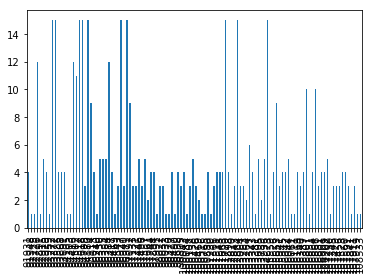

In [273]:
spsddrop["Principal_atitude"].plot(kind='bar', legend = False)

___
## Conclusão 

Descreva aqui suas conclusões!